In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression

# 앞서 진행한 데이터 불러오는 과정 ~ 필요한 열 생성 과정 요약
# 데이터 불러오기
train = pd.read_csv('/content/Sparta_CodingClub_Boston.csv')

In [ ]:
train

,TOWN,TOWN#,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,0,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,1,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,1,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,2,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,2,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,91,-70.9860,42.2312,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,Winthrop,91,-70.9910,42.2275,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,Winthrop,91,-70.9948,42.2260,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,Winthrop,91,-70.9875,42.2240,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
train.columns

Index(['TOWN', 'TOWN#', 'LON', 'LAT', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS',
       'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

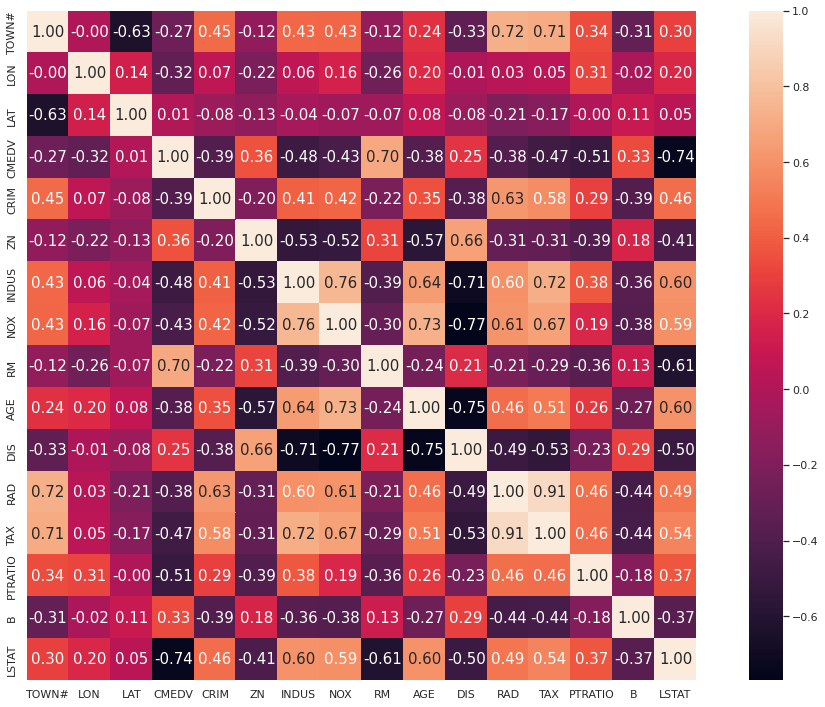

In [ ]:
cols = ['TOWN#', 'LON', 'LAT', 'CMEDV', 'CRIM', 'ZN', 'INDUS',
       'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
corr = train[cols].corr(method='pearson')

plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)
plt.tight_layout()
plt.show()

- 타겟은 CMEDV

lstat과 높은 상관관계를 가지고 있다.  
town은 이미 번호로 되어있는 열이 있기 때문에 제거  
상관관계가 낮은 CHAS,TOWN#,LON,LAT,DLS,B도 제거

In [ ]:
drop_columns = ['TOWN','CHAS','TOWN#','LON','LAT','DIS','B']
train.drop(drop_columns, axis=1, inplace=True)
train

,CMEDV,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,24.0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296,15.3,4.98
1,21.6,0.02731,0.0,7.07,0.469,6.421,78.9,2,242,17.8,9.14
2,34.7,0.02729,0.0,7.07,0.469,7.185,61.1,2,242,17.8,4.03
3,33.4,0.03237,0.0,2.18,0.458,6.998,45.8,3,222,18.7,2.94
4,36.2,0.06905,0.0,2.18,0.458,7.147,54.2,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.573,6.593,69.1,1,273,21.0,9.67
502,20.6,0.04527,0.0,11.93,0.573,6.120,76.7,1,273,21.0,9.08
503,23.9,0.06076,0.0,11.93,0.573,6.976,91.0,1,273,21.0,5.64
504,22.0,0.10959,0.0,11.93,0.573,6.794,89.3,1,273,21.0,6.48


In [ ]:
train.isna().sum()
# 결측치 없음

CMEDV      0
CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
dtype: int64

모든 열을 스케일링해주자

In [ ]:
from sklearn.preprocessing import StandardScaler

columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']

scaler = StandardScaler()
train[columns] = scaler.fit_transform(train[columns])

In [ ]:
train

,CMEDV,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,0.160376,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,1,-0.666608,-1.459000,-1.075562
1,-0.101258,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,2,-0.987329,-0.303094,-0.492439
2,1.326830,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,2,-0.987329,-0.303094,-1.208727
3,1.185112,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,3,-1.106115,0.113032,-1.361517
4,1.490352,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,3,-1.106115,0.113032,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.014047,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,1,-0.803212,1.176466,-0.418147
502,-0.210273,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,1,-0.803212,1.176466,-0.500850
503,0.149475,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,1,-0.803212,1.176466,-0.983048
504,-0.057653,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,1,-0.803212,1.176466,-0.865302


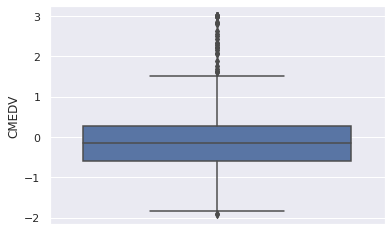

In [ ]:
sns.boxplot(data=train, y="CMEDV",orient="v")

삭제를 해줘야하는 이상치는 없는 듯 하다.

In [ ]:
y_target = train['CMEDV']
x_features = train.drop(['CMEDV'], axis=1, inplace=False)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=.2, random_state=777)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([-0.08093741,  0.00858735,  0.09574554, -0.12728011,  0.29291201,
        0.10945829,  0.03489204, -0.28097989, -0.25349975, -0.47923397])

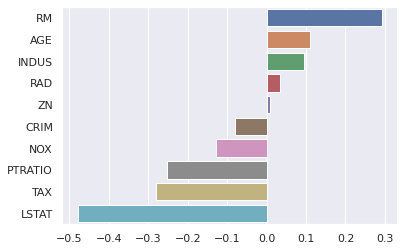

In [ ]:
coefs = pd.DataFrame(zip(x_features.columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs = coefs.sort_values(by=['coefficients'], ascending=False).reset_index(drop=True)

sns.barplot(x=coefs['coefficients'][:20].values, y=coefs['feature'][:20].values)

In [ ]:
print(lr.score(x_test, y_test))
print(lr.score(x_train, y_train))

0.6618973246588055
0.7092146977150801


In [ ]:
from sklearn.linear_model import Ridge

rg = Ridge(alpha=15) #alpha는 규제를 하고자 하는 정도
rg.fit(x_train, y_train)
# 규제는 적당하게 해야지 정확도가 올라간다. 너무 과하거나 적으면 정확도 감소

print(rg.score(x_test, y_test))
print(rg.score(x_train, y_train))

0.6627933277454228
0.7078992225669736


In [ ]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.1)
ls.fit(x_train, y_train)

print(ls.score(x_test, y_test))
print(ls.score(x_train, y_train))

0.6309851745255406
0.6700598054370647
